# Improve CampusX

## Instructions

1. You have to submit your solutions before **6:00pm tomorrow**
2. The problems that I have given(**except the 1st one**) are problems with which we are also dealing with. So, in a way we are asking for your help through this hackathon.
3. To be honest solving even a single question is a big deal in the given time duration. So, please don't get **frustrated** if you are not able to solve even one problem. 
4. A request - **don't quit**. Infact **never quit**.
5. Marking Scheme for this hackathon is as follows
**Total Marks=200**
but, while adding this to your dashboard, your total marks will be divided by a **factor of 10**.
So, let's say you scored 90 in the hackathon, you dashboard score would be 9
6. Top 3 performers will get a **prize**, when we will meet next.Promise:)


In [3]:
import pandas as pd
import numpy as np

In [4]:
batch=pd.read_csv("batch.csv")
batch_task=pd.read_csv("batch_task.csv")
content=pd.read_csv("content.csv")
course=pd.read_csv("course.csv")
evaluation=pd.read_csv("evaluation.csv")
gyan=pd.read_csv("gyan.csv")
link_preview=pd.read_csv("link_preview_details.csv")
module=pd.read_csv("module.csv")
myday=pd.read_csv("myday.csv")
tasks=pd.read_csv("tasks.csv",encoding='latin-1',error_bad_lines=False)
url_task=pd.read_csv("url_task.csv")
users=pd.read_csv("users.csv")

b'Skipping line 16: expected 7 fields, saw 10\n'


**Problem 1** : Write a python function which will receive 3 input i.e. batch name, start date and end date and returns the leaderboard(in that date window) of that particular batch with the following pieces of info - Name, Marks(till now)

Note: If no date range is provided, show the leaderboard for the entire duration of the course

**Marks -10**

In [583]:
# Write your code here
def namemarks(l1,d1='0-0-0',d2='0-0-0'):
    x1=evaluation.merge(users,left_on='user_id',right_on='user_id')
    x1=x1.merge(batch,left_on='batch_id',right_on='batch_id')
    x2=x1['batch_name']==l1
    x2=x1[x2]
    if(d1!='0-0-0' and d2!='0-0-0'):
        x4=x2['evaluation_date']>d1
        x5=x2['evaluation_date']<d2
        x6=x2[x4 & x5]
    else:
        x6=x2
    x7=x6.groupby(['fname','lname'])
    x7=x7['score'].sum().sort_values(ascending=False)
    x7
    return x7

In [587]:
namemarks('Machine Learning Kolkata 1','2020-01-20','2020-01-39')
#namemarks('Machine Learning Kolkata 1')

fname      lname       
Shakib     Mondal          47.0
Shantanu   Shubham         44.0
Kunal      N. Gohrani      43.5
Sushree    Siddhishikha    42.0
Dipam      Hazra           42.0
Purbita    Sur             37.0
Bhavna     Kumari          33.0
Vishal     Malo            31.5
Chandrima  Sarkar          27.0
Arya       Sarkar          23.0
Surabhi    Basak           22.0
Kaushal    Agarwal         18.0
Ujjainee   De              17.0
Roumyak    Biswas           9.0
Durga      Agarwal          8.5
Prasoon    Thakur           8.0
Sharika    Anjum Mondal     6.0
Name: score, dtype: float64

**Problem 2**: Write a python function that receives 1 input, batch_name and returns the list of top 10 students who require maximum attention from the teacher.

**Note**: I know this is kind of abstract, but truly we are facing this problem. Try to come up with a solution/algorithm. 

**Tip** : Don't just think in terms of marks, also think about things like late submissions, number of submissions, myday etc

**Tricky scenario**: Aisa bhi ho sakta hai koi student bas shuru me acha perform nai kar raha tha, but ab kar raha hai. So consider dates also.

**Marks : 50**

In [0]:
# Write your code here

**Problem 3**: Write a python function that will take batch name and a date range as input and outputs the most consistent student in that given daterange and batch

**Note**: Come up with your definition of consistency

**Marks - 20** 

In [0]:
# Write your code here

**Problem 4**: Find the best student across batches

**Marks - 20**

In [596]:
# Write your code here
x1=evaluation.merge(users,left_on='user_id',right_on='user_id')
    x1=x1.merge(batch,left_on='batch_id',right_on='batch_id')
x8=x1.groupby(['fname','lname','batch_name'])
x8=x8['score'].sum().sort_values(ascending=False).head(1)
print("The best student accross the batches is \n",x8)

The best student accross the batches is 
 fname   lname  batch_name                
Ritwik  Ghosh  Machine Learning Kolkata 2    154.5
Name: score, dtype: float64


**Problem 5** : Write a function/piece of analysis that can compare the performance of 2 batches on the whole

**Note**: Again Abstract

**Note 2**: Will be judging you a lot on the basis of this.

**Note 3**: You can get an instant internship under us, if can apply the right thought process to this problem

**Marks - 50**

In [597]:
# Write your code here
batch

,batch_id,batch_name,batch_start_date
0,1,Machine Learning Kolkata 1,2020-01-01
1,2,Machine Learning HIT 1,2020-01-01
2,3,Machine Learning Kolkata 2,2020-01-19


In [599]:
def compare(l1,l2):
    import matplotlib.pyplot as plt
    a0=users.merge(batch,left_on='batch_id',right_on='batch_id')
    a1=a0['batch_name']==l1
    a1=a0[a1]
    v3=a1.shape[0]
    a4=a0['batch_name']==l2
    a4=a0[a4]
    v6=a4.shape[0]
    g1=myday.dropna()
    w1=g1.groupby('user_id')
    m1=g1.merge(users,left_on='user_id',right_on='user_id')
    m1=m1.merge(batch,left_on='batch_id',right_on='batch_id')
    v1=m1['batch_name']==l2
    v1=m1[v1]
    v4=v1.shape[0]
    v5=v4/v6
    v2=m1['batch_name']==l1
    v2=m1[v2]
    v7=v2.shape[0]
    v8=v7/v3
    labels=l1,l2
    sizes=[v5,v8]
    p5=plt.pie(sizes, labels=labels,autopct='%1.1f%%')
    p5=plt.title("Most Active Group In Terms Of MYDAY")
    p5=plt.show()
    #print (p5)
    m2=gyan.merge(users,left_on='user_id',right_on='user_id')
    m2=m2.merge(batch,left_on='batch_id',right_on='batch_id')
    v9=m2['batch_name']==l2
    v9=m2[v9]
    v10=v9.shape[0]
    v13=v10/v6
    v11=m2['batch_name']==l1
    v11=m2[v11]
    v12=v11.shape[0]
    v14=v12/v3
    sizes1=[v13,v14]
    labels1=l2,l1
    p6=plt.pie(sizes1,labels=labels1,autopct='%1.1f%%')
    p6=plt.title("\nMost Active Group In Terms Of GYAN")
    p6=plt.show()
    m3=evaluation.merge(users,left_on='user_id',right_on='user_id')
    m3=m3.merge(batch,left_on='batch_id',right_on='batch_id')
    w1=m3['batch_name']==l1
    w2=m3['batch_name']==l2
    m4=m3[w1]
    m5=m3[w2]
    v15=m4.groupby(['user_id','fname','lname'])
    v16=m5.groupby(['user_id','fname','lname'])
    v15=v15['score'].sum().sort_values(ascending=False).head(1)
    v16=v16['score'].sum().sort_values(ascending=False).head(1)
    print("\nThe highest score scored by the batch",l1+" is\n", v15)
    print("\n\nThe highest score scored by the batch",l2+" is\n", v16)
    m3=evaluation.merge(users,left_on='user_id',right_on='user_id')
    m3=m3.merge(batch,left_on='batch_id',right_on='batch_id')
    v17=m3['late']!=0
    v17=m3[v17]
    w2=v17['batch_name']==l1
    w2=v17[w2]
    w3=w2.groupby(['user_id','fname','lname','batch_name'])
    w3=w3['late'].sum().sort_values(ascending=False).head(5)
    v18=w2.shape[0]
    v18=v18/v3
    w4=v17['batch_name']==l2
    w4=v17[w4]
    w5=w4.groupby(['user_id','fname','lname','batch_name'])
    w5=w5['late'].sum().sort_values(ascending=False).head(5)
    v19=w4.shape[0]
    v19=v19/v6
    size2=[v18,v19]
    label1=l1,l2
    p7=plt.pie(size2,labels=labels1,autopct='%1.1f%%')
    p7=plt.title("\nPencentage of late submissins")
    p7=plt.show()
    #print(p7)
    print("\nTop 5 late submmiters from the batch",l1+" is\n",w3)
    print("\n\nTop 5 late submmiters from the batch",l2+" is\n",w5)
    v20=m3['winner']!=0
    v20=m3[v20]
    w6=v20['batch_name']==l1
    w6=v20[w6]
    w7=w6.groupby(['user_id','fname','lname','batch_name'])
    w7=w7['winner'].sum().sort_values(ascending=False).head(5)
    v21=w6.shape[0]
    v21=v21/v3
    w8=v20['batch_name']==l2
    w8=v20[w8]
    w9=w8.groupby(['user_id','fname','lname','batch_name'])
    w9=w9['winner'].sum().sort_values(ascending=False).head(5)
    v22=w8.shape[0]
    v22=v22/v6
    size3=[v21,v22]
    label2=l1,l2
    p8=plt.pie(size3,labels=label2,autopct='%1.1f%%')
    p8=plt.title("\nPencentage of Winners")
    p8=plt.show()
    print("\nTop 5 winners from the batch",l1+" is\n",w7)
    print("\n\nTop 5 winners from the batch",l2+" is\n",w9)

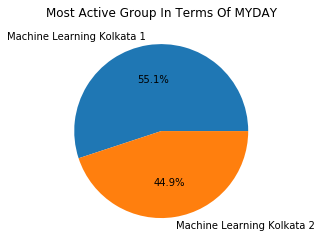

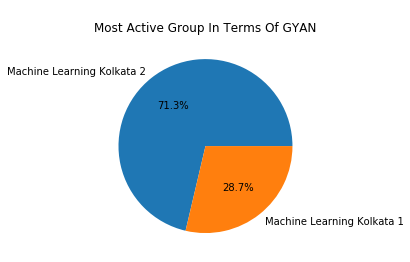


The highest score scored by the batch Machine Learning Kolkata 1 is
 user_id  fname   lname 
16       Shakib  Mondal    128.0
Name: score, dtype: float64


The highest score scored by the batch Machine Learning Kolkata 2 is
 user_id  fname   lname
75       Ritwik  Ghosh    154.5
Name: score, dtype: float64


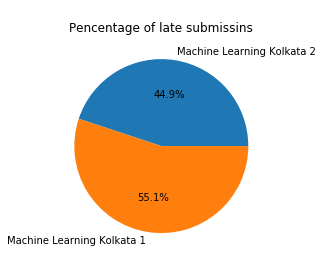


Top 5 late submmiters from the batch Machine Learning Kolkata 1 is
 user_id  fname      lname    batch_name                
21       Ujjainee   De       Machine Learning Kolkata 1    3
1        Durga      Agarwal  Machine Learning Kolkata 1    3
18       Chandrima  Sarkar   Machine Learning Kolkata 1    2
16       Shakib     Mondal   Machine Learning Kolkata 1    2
14       Surabhi    Basak    Machine Learning Kolkata 1    2
Name: late, dtype: int64


Top 5 late submmiters from the batch Machine Learning Kolkata 2 is
 user_id  fname       lname           batch_name                
105      GAZAL       GARG            Machine Learning Kolkata 2    4
85       Sarthak     Kundu           Machine Learning Kolkata 2    4
70       Sagar       Sarkar          Machine Learning Kolkata 2    4
104      Priscila    Tamang Ghising  Machine Learning Kolkata 2    4
84       Madhuparna  Majumdar        Machine Learning Kolkata 2    4
Name: late, dtype: int64


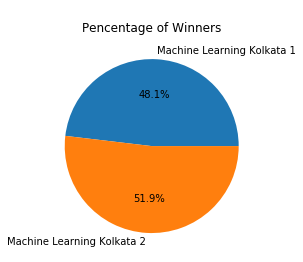


Top 5 winners from the batch Machine Learning Kolkata 1 is
 user_id  fname     lname       batch_name                
15       Kunal     N. Gohrani  Machine Learning Kolkata 1    5
16       Shakib    Mondal      Machine Learning Kolkata 1    3
12       Vishal    Malo        Machine Learning Kolkata 1    3
5        Purbita   Sur         Machine Learning Kolkata 1    3
21       Ujjainee  De          Machine Learning Kolkata 1    2
Name: winner, dtype: int64


Top 5 winners from the batch Machine Learning Kolkata 2 is
 user_id  fname       lname     batch_name                
90       Ritayan     Dhara     Machine Learning Kolkata 2    7
78       Balaka      Biswas    Machine Learning Kolkata 2    5
75       Ritwik      Ghosh     Machine Learning Kolkata 2    5
93       Writuparna  Banerjee  Machine Learning Kolkata 2    4
76       Ritik       Verma     Machine Learning Kolkata 2    4
Name: winner, dtype: int64


In [600]:
compare('Machine Learning Kolkata 1','Machine Learning Kolkata 2')


**Problem 6** : Surprise us

**Description**: Find something(point/points of analysis) that might surprise us

**Marks - 50**

In [619]:
k1=evaluation.merge(tasks,left_on='task_id',right_on='task_id')
k2=k1.groupby(['task_id','task_name'])
k3=k2['late'].sum().sort_values(ascending=False).head(3)
print ("Top 3 tasks which have most late submissions\n",k3)

Top 3 tasks which have most late submissions
 task_id  task_name                                                  
30       Numpy Assignment 4                                             18
31       Numpy Assessment                                               16
22       ML #2 Task #2 Create schema of Milestone project on AWS RDS    10
Name: late, dtype: int64
